In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [49]:
df=pd.read_csv('twitter_validation.csv',header=None,encoding='ISO-8859-1')
df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [50]:
df.columns=['Id','media','target','text']

In [51]:
df.shape

(1000, 4)

In [52]:
df.head()

,Id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [53]:
df.tail()

,Id,media,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [54]:
df.dtypes

Id         int64
media     object
target    object
text      object
dtype: object

In [55]:
df.isna().sum()

Id        0
media     0
target    0
text      0
dtype: int64

In [56]:
df['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

Text(0.5, 1.0, 'Target-Count')

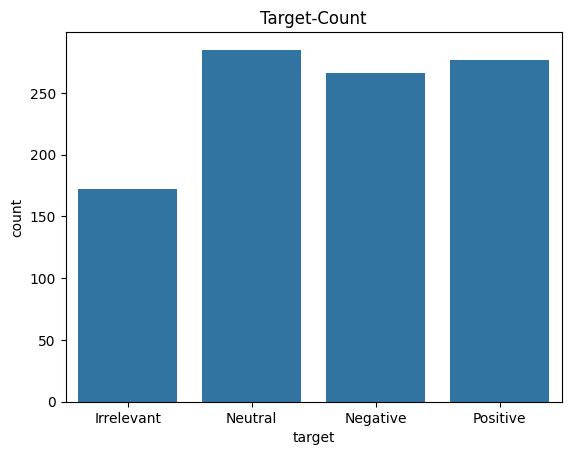

In [57]:
sns.countplot(x=df['target'],data=df)
plt.title('Target-Count')

In [58]:
df['media'].value_counts()

media
RedDeadRedemption(RDR)               40
johnson&johnson                      39
PlayerUnknownsBattlegrounds(PUBG)    38
FIFA                                 38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Facebook                             33
Verizon                              32
Hearthstone                          32
Overwatch                            32
CS-GO                                32
CallOfDuty                           31
WorldOfCraft                         30
Cyberpunk2077                        30
MaddenNFL                            29
Microsoft                            28
Dota2                             

In [59]:
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)
df

,Id,media,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [60]:
df.reset_index(drop=True,inplace=True)
df

,Id,media,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [61]:
df.drop(['Id','media'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [62]:
mapping={'Positive':1,'Negative':-1,'Neutral':0}
df['target']=df['target'].map(mapping)
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [63]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [64]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [65]:
#Tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply (lambda x:tk. tokenize(x)).apply(lambda x:' '.join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [66]:
#remove special characters
tweets=tweets.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [67]:
#Collect words having length>=3
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [68]:
#Stemming and lower case
from nltk.stem import SnowballStemmer
sb=SnowballStemmer(language='english')
tweets=tweets.apply(lambda x:' '.join([sb.stem(i.lower()) for i in tk.tokenize(x)]))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [69]:
#Stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x: ' '.join(i for i in tk.tokenize(x) if i not in stop))
tweets 

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [70]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)
train_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10505 stored elements and shape (828, 3783)>

In [71]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.20,random_state=1)

In [73]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)
y_pred1

array([ 0, -1,  0,  1, -1, -1, -1,  0,  1, -1,  0,  0,  0,  0, -1,  0,  0,
       -1,  1, -1,  1, -1,  0,  1, -1,  0,  0,  1, -1,  0,  1, -1,  1,  1,
       -1,  0, -1, -1, -1,  1,  0, -1,  1, -1, -1,  1,  1, -1, -1,  0,  0,
        0, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  0, -1, -1,  1,
       -1, -1, -1, -1,  0,  0,  0,  0, -1,  1, -1,  1,  1,  0, -1, -1, -1,
       -1, -1,  0, -1, -1, -1,  1, -1, -1,  1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  0, -1, -1, -1,  0,  1, -1,
       -1, -1,  1,  0, -1,  1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  1,
        0,  1,  1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1])

In [74]:
from sklearn.metrics import accuracy_score
score1=accuracy_score(y_test,y_pred1)*100
score1

51.80722891566265

In [75]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
y_pred2

array([ 1, -1,  0,  1,  1, -1, -1,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
       -1, -1,  0,  1,  0,  1,  1, -1,  0,  1,  1, -1,  1,  1,  0,  1,  1,
       -1,  1, -1, -1,  0,  1,  1, -1,  1, -1, -1,  1,  1,  0, -1,  0,  0,
        0, -1,  1,  1, -1,  1,  1, -1,  1, -1,  0,  1,  1,  1,  1, -1,  1,
        1,  0,  1,  1,  0, -1,  0, -1,  1, -1, -1,  1,  0,  0,  1, -1,  1,
        0,  0, -1, -1,  0,  1,  0,  0, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  1, -1, -1,  0, -1,
       -1, -1,  1,  1,  1,  1, -1,  0, -1,  1,  1, -1, -1, -1,  1,  0, -1,
        1,  0,  1,  0, -1,  1,  0,  1,  0,  0,  1, -1,  0,  0,  0, -1,  1,
       -1,  1,  1,  0, -1,  1,  1,  0,  1, -1, -1, -1,  1])

In [76]:
from sklearn.metrics import accuracy_score
score2=accuracy_score(y_test,y_pred2)*100
score2

60.24096385542169

In [77]:
#Svm
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred3=svc.predict(x_test)
y_pred3

array([ 0, -1,  0,  1, -1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
       -1, -1,  0,  1,  0,  0,  1, -1,  0,  0,  1, -1,  0,  1,  0,  0,  1,
       -1,  0, -1, -1,  0,  1,  0, -1,  1, -1, -1,  1,  1,  0, -1,  0,  0,
        0, -1, -1,  1, -1,  1,  1, -1,  1, -1,  0,  0, -1,  1,  1,  0,  1,
        0,  0,  1,  1,  0, -1,  0,  0,  1, -1, -1,  1,  0,  0,  1, -1,  1,
        0,  0,  0, -1,  0,  0,  0,  1, -1,  0,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  0,  0, -1,  0,  1,  0,  1,  1, -1,  0,  1, -1,  0,  0, -1,
        0, -1,  1,  1,  1,  1, -1,  0,  0,  1,  0, -1, -1, -1,  1,  0, -1,
        1, -1,  1,  0, -1,  1,  0,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,
       -1,  1,  1,  0, -1,  1, -1,  0,  1, -1, -1, -1,  1])

In [78]:
from sklearn.metrics import accuracy_score
score3=accuracy_score(y_test,y_pred3)*100
score3

62.048192771084345

In [79]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
y_pred4=tree.predict(x_test)
y_pred4

array([ 0, -1,  1, -1,  1, -1, -1,  0,  1,  1,  0,  0,  0, -1,  1, -1,  1,
       -1,  0, -1,  1,  1, -1,  1, -1,  0,  1,  1,  1,  0, -1,  0, -1, -1,
       -1,  1, -1, -1,  0,  0,  0, -1,  0, -1,  0,  1,  0,  0,  0,  0,  0,
        0,  1, -1,  1, -1,  1,  1,  0,  1,  0, -1,  0, -1,  1,  0,  1,  1,
        0,  0,  1,  0,  0,  1,  0,  1, -1,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  0,  1,  1,  0,  1,  0,  0,  1, -1,  0,  1,  1,  0,  0, -1,
        0, -1,  1,  1,  1,  1, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,
        0,  0, -1,  0, -1, -1,  0,  0,  1, -1,  0,  1,  1,  0,  0,  1,  0,
       -1,  1,  0, -1, -1,  0, -1,  0,  1,  1, -1, -1,  1])

In [80]:
from sklearn.metrics import accuracy_score
score4=accuracy_score(y_test,y_pred4)*100
score4

51.204819277108435

In [81]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred5=model.predict(x_test)
y_pred5

array([ 0, -1,  0, -1, -1, -1, -1,  0,  1,  1,  0, -1, -1,  0,  1,  0,  1,
       -1, -1, -1,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0, -1,  0,  0, -1,
       -1,  0, -1, -1,  0,  1,  0,  1,  0, -1,  0,  1,  0,  0, -1, -1,  0,
        0, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  0, -1, -1,  1, -1,  1,
        0,  0,  1,  0, -1,  1,  0, -1,  1, -1, -1,  1,  0,  0, -1, -1, -1,
        0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  1, -1,  0,  1,  1, -1, -1,
       -1, -1,  0,  0, -1,  0, -1,  0,  0,  1, -1,  0, -1, -1,  0, -1, -1,
        0, -1,  1,  1,  1,  1,  0,  0,  0,  1,  0, -1, -1, -1,  1,  0,  0,
        1, -1, -1, -1, -1,  1,  0,  1, -1, -1, -1, -1,  1,  0,  1, -1,  1,
       -1,  1,  1, -1, -1,  0, -1,  0,  1, -1, -1, -1,  1])

In [82]:
from sklearn.metrics import accuracy_score
score5=accuracy_score(y_test,y_pred5)*100
score5

59.036144578313255

In [83]:
df1=pd.DataFrame({'Model Name':['KNN','naive Bayes','SVM','Decision Tree','Random Forest'],'Score':[score1,score2,score3,score4,score5]})
df1

,Model Name,Score
0,KNN,51.807229
1,naive Bayes,60.240964
2,SVM,62.048193
3,Decision Tree,51.204819
4,Random Forest,59.036145


Text(0, 0.5, 'Score(%)')

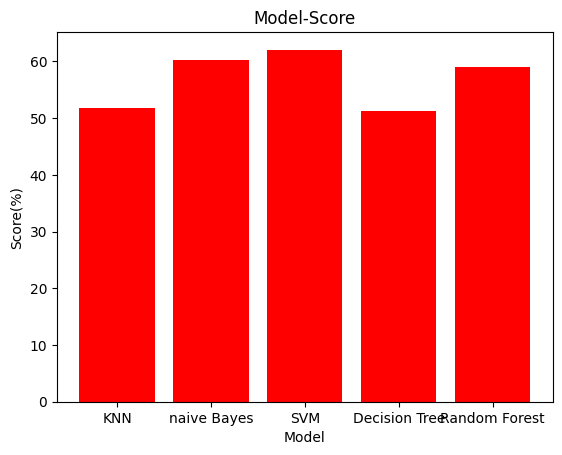

In [84]:
plt.bar(df1['Model Name'],df1['Score'],color='r')
plt.title('Model-Score')
plt.xlabel('Model')
plt.ylabel('Score(%)')

In [90]:
#input
tw=['This is an ok day']
tw=vec.transform(tw)
op=svc.predict(tw)
if op>0:
    print('Postive review')
elif op==0:
    print('Neutral review')
else:
    print('Negative review')


Postive review
